In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
new_model = tf.keras.models.load_model('model.h5')

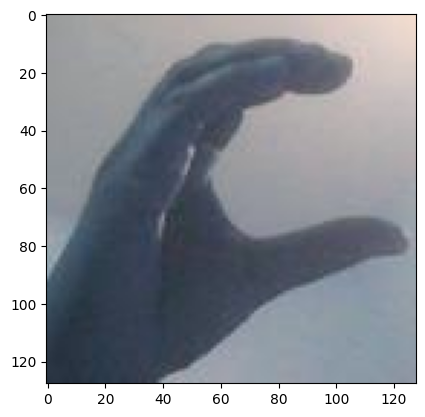

In [2]:
img = cv2.imread('C (1).jpg')
plt.imshow(img)

In [25]:
import numpy as np
img224 = cv2.resize(img, (224,224))
img224 = img224 / 255.0

# Add a batch dimension to make it (1, 224, 224, 3)
img224 = np.expand_dims(img224, axis=0)

# Predict using the model
ans = np.argmax((new_model.predict(img224)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [22]:
num_val = dict()
for i in range(0,9):
    num_val[i] = i+1 

In [ ]:
list_abc = [chr(x) for x in range(65,91)]
for i, char in enumerate(list_abc):
    num_val[i + 9] = char
num_val

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 'A',
 10: 'B',
 11: 'C',
 12: 'D',
 13: 'E',
 14: 'F',
 15: 'G',
 16: 'H',
 17: 'I',
 18: 'J',
 19: 'K',
 20: 'L',
 21: 'M',
 22: 'N',
 23: 'O',
 24: 'P',
 25: 'Q',
 26: 'R',
 27: 'S',
 28: 'T',
 29: 'U',
 30: 'V',
 31: 'W',
 32: 'X',
 33: 'Y',
 34: 'Z'}

In [27]:
num_val[ans]

'C'

In [ ]:


# Load your fine-tuned model
model = tf.keras.models.load_model('model.h5')

# Function to preprocess the frames for the model
def preprocess_frame(frame):
    # Resize the frame to match the model input size
    img_resized = cv2.resize(frame, (224, 224))
    img_resized = img_resized / 255.0  # Normalize pixel values
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    return img_resized

# Start capturing video from the camera (index 0 is usually the default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    # Capture each frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)

    # Get predictions from the model
    predictions = model.predict(preprocessed_frame)

    # Display the predictions on the frame (you can modify this based on your task)
    # For example, if you're doing classification:
    prediction_label = np.argmax(predictions, axis=1)[0]  # Get the label with the highest probability
    confidence = np.max(predictions)  # Get the highest confidence score

    # Add the prediction text to the frame
    label_text = f"Prediction: {prediction_label} (Confidence: {confidence:.2f})"
    cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame with the prediction
    cv2.imshow("Camera Feed", frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()
